In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show_svd(mat,hl=None,vl=None):
    u,s,vt = np.linalg.svd(mat,full_matrices=False)

    fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(12,3.75))
    h = ax0.imshow(vt.T,cmap="RdBu",vmin=-1,vmax=1)
    if vl is not None:
        ax0.vlines(vl,0,vt.shape[0]-1)    
    if hl is not None:
        ax0.hlines(hl,0,vt.shape[0]-1)
    #ax0.set_yticks(range(6))
    #ax0.set_yticklabels(["Tx","Ty","Tz","Rx","Ry","Rz"])
    ax0.grid()
    ax0.set_title("eigen modes")
    fig.colorbar(h,ax=ax0)
    ax1.semilogy(s/s[0],'.-')
    ax1.grid()
    ax1.set_title("eigen values");

In [4]:
def show_svd_p(mat,t,hl=None,vl=None):
    u,s,vt = np.linalg.svd(mat,full_matrices=False)

    fig,(ax0,ax1,ax2) = plt.subplots(ncols=3,figsize=(18,3.75))
    h = ax0.imshow(vt.T,cmap="RdBu",vmin=-1,vmax=1)
    if vl is not None:
        ax0.vlines(vl,0,vt.shape[0]-1)    
    if hl is not None:
        ax0.hlines(hl,0,vt.shape[0]-1)
    #ax0.set_yticks(range(6))
    #ax0.set_yticklabels(["Tx","Ty","Tz","Rx","Ry","Rz"])
    ax0.grid()
    ax0.set_title("eigen modes")
    fig.colorbar(h,ax=ax0)
    ax1.semilogy(s/s[0],'.-')
    ax1.grid()
    ax1.set_title("eigen values");
    v_t = vt.T[:,:t]
    ax2.imshow(v_t@v_t.T,cmap="RdBu",vmin=-1,vmax=1)
    ax2.set_title("VV^T");


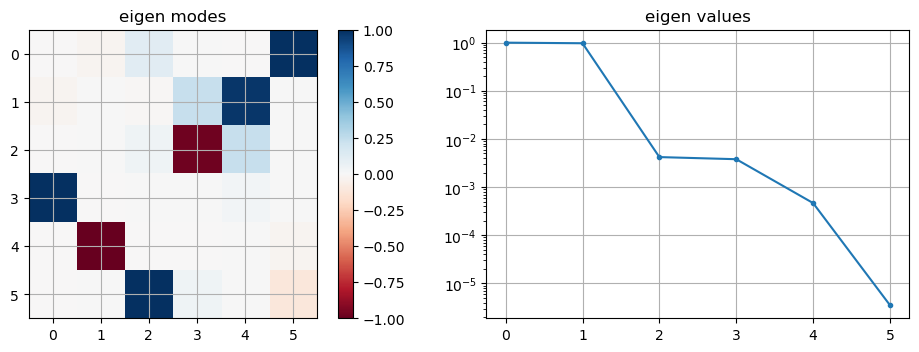

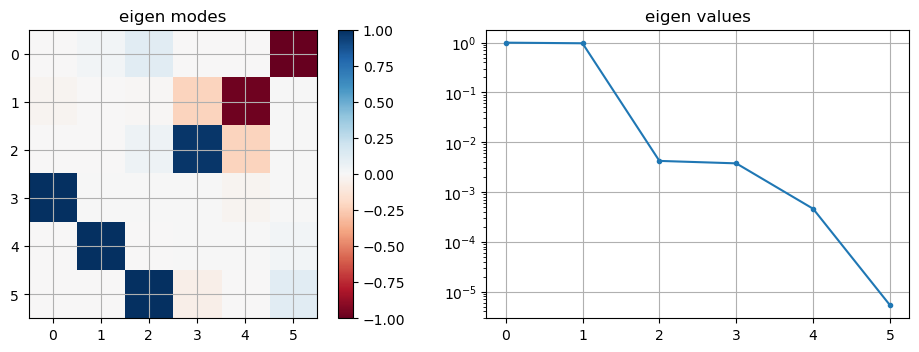

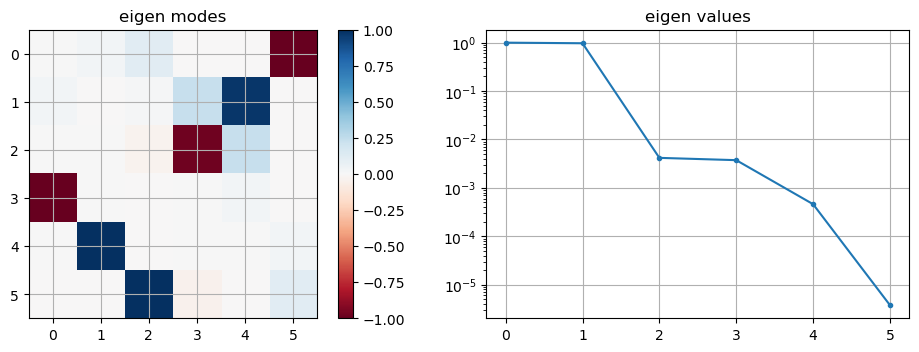

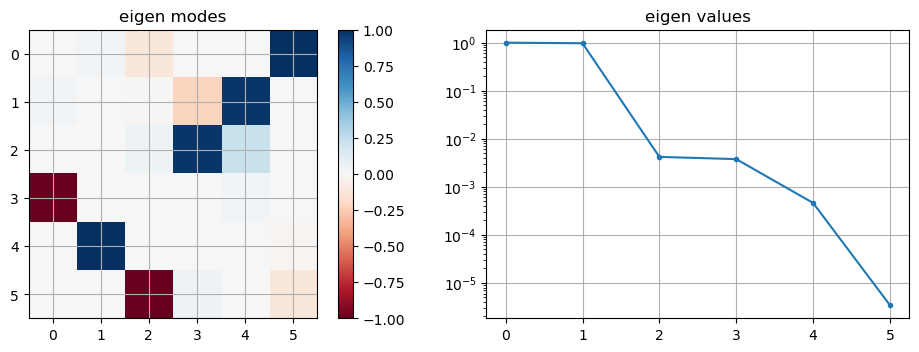

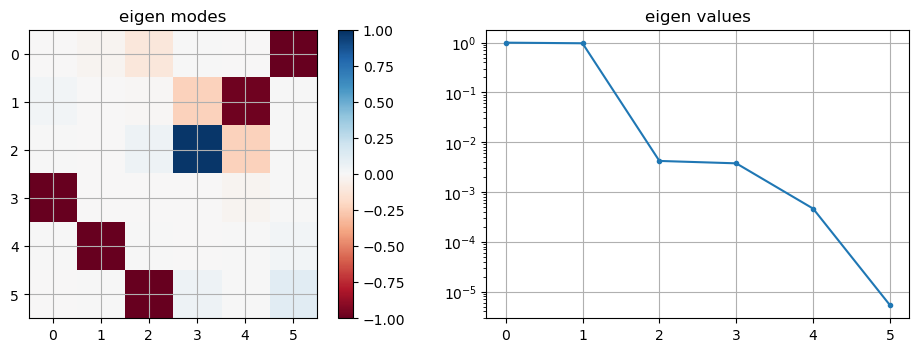

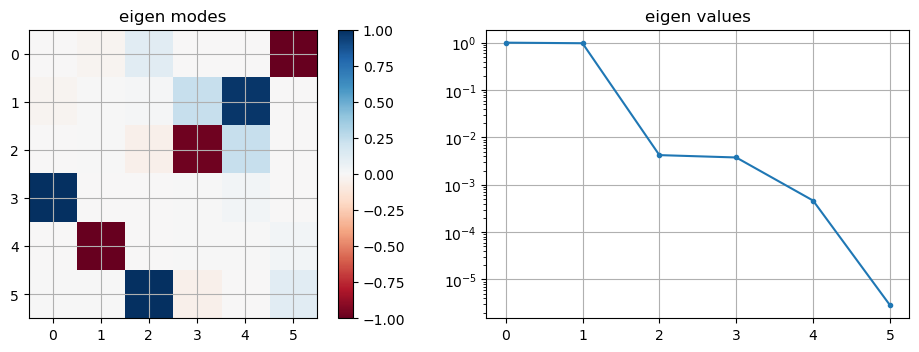

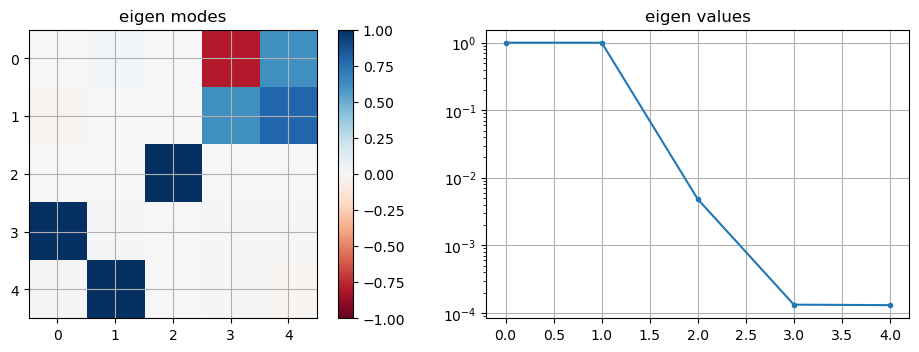

In [4]:
m1_rbm = np.load("open_loop_recon_sh48-to-m1-rbm.pkl",allow_pickle=True)
for i in range(6):
    show_svd(np.asarray(m1_rbm['calib'][i]['c']).reshape(6,-1).T)
show_svd(np.asarray(m1_rbm['calib'][6]['c']).reshape(5,-1).T)


In [19]:
m2_clocking_rbm = np.load("m2_clocking_rbms.pkl",allow_pickle=True)
np.asarray(m2_clocking_rbm[:6]).shape#*1e6

(6,)

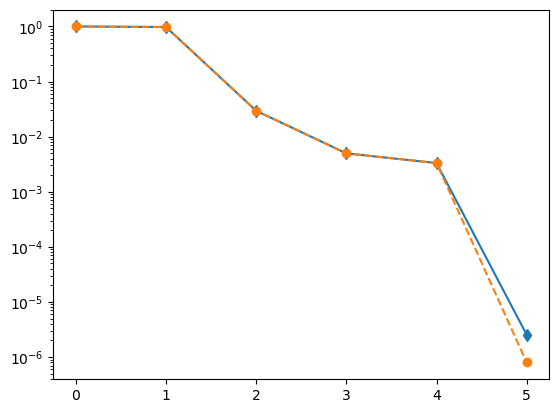

In [26]:
m2s1 = np.asarray(m2_rbm['calib'][i]['c']).reshape(6,-1).T
u,s0,vt = np.linalg.svd(m2s1)
S = np.hstack([1e-6 * m2s1, np.zeros((m2s1.shape[0],1))])
L = np.hstack([1e-6*np.eye(6),np.asarray(m2_clocking_rbm[:6])[:,None]])
D = S @ np.linalg.pinv(L)
u,s,vt = np.linalg.svd(D)
fig,ax = plt.subplots()
ax.semilogy(s0/s0[0],'d-')
ax.semilogy(s/s[0],'o--')

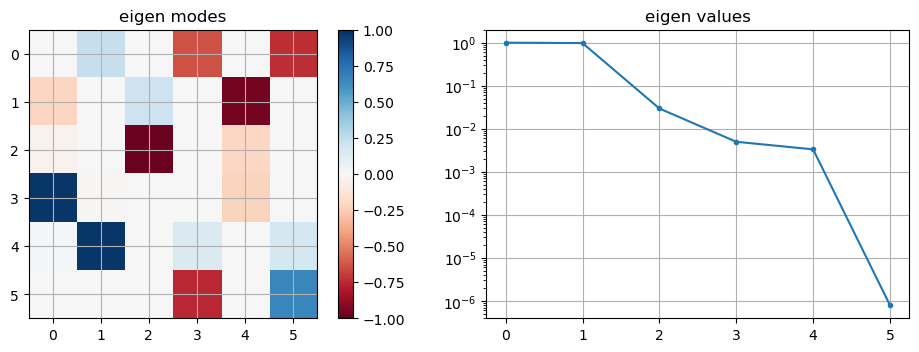

In [27]:
show_svd(D)

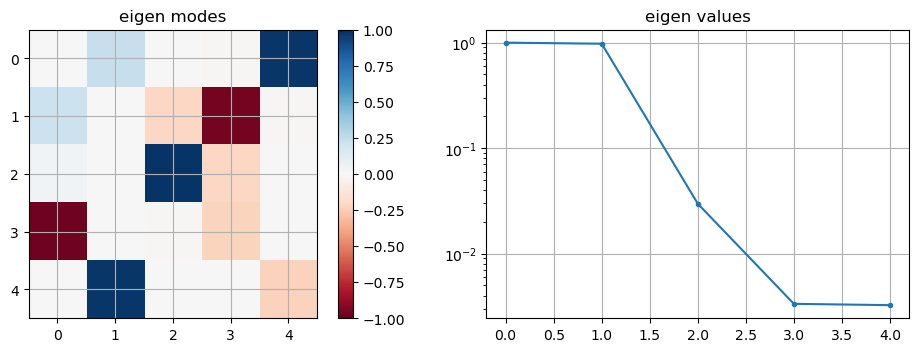

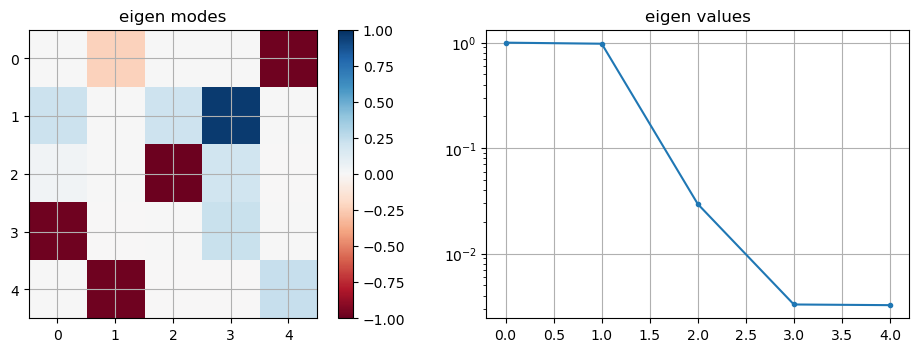

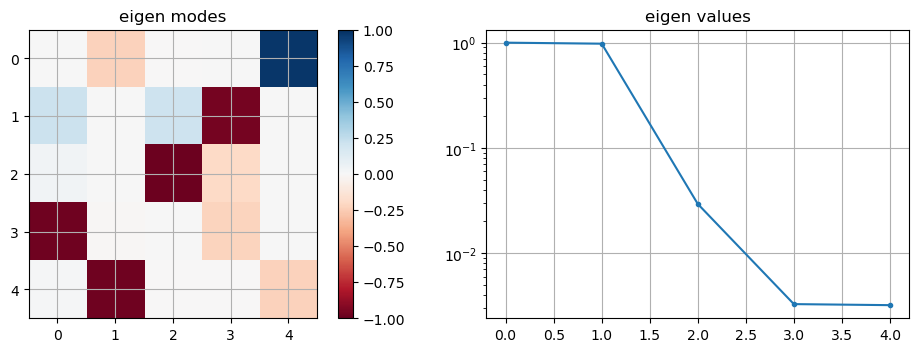

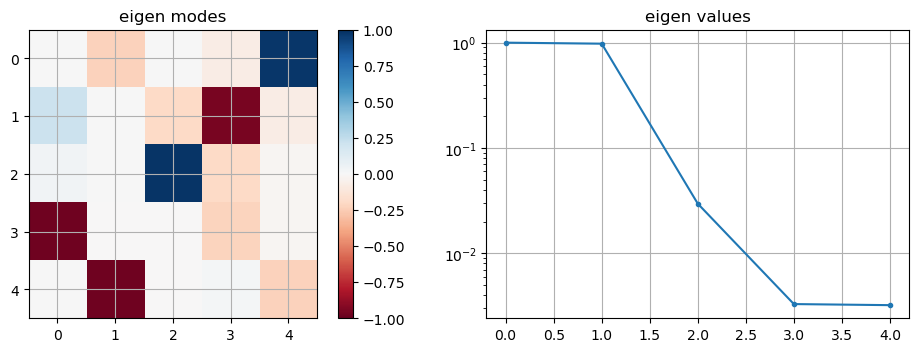

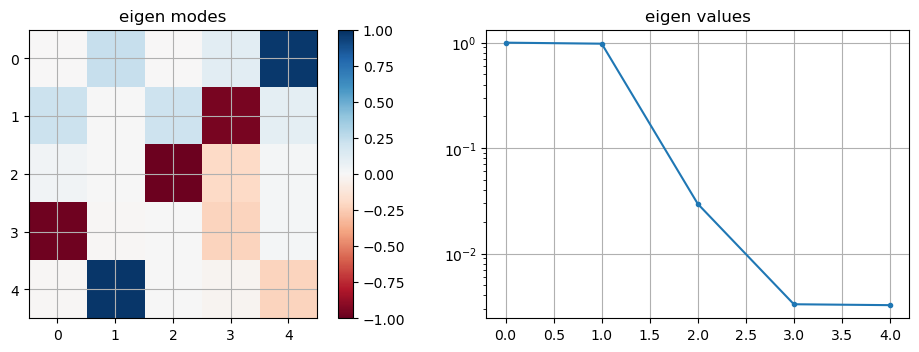

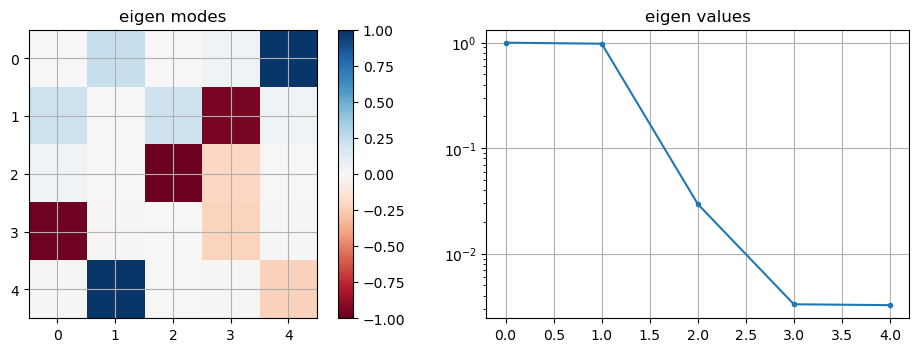

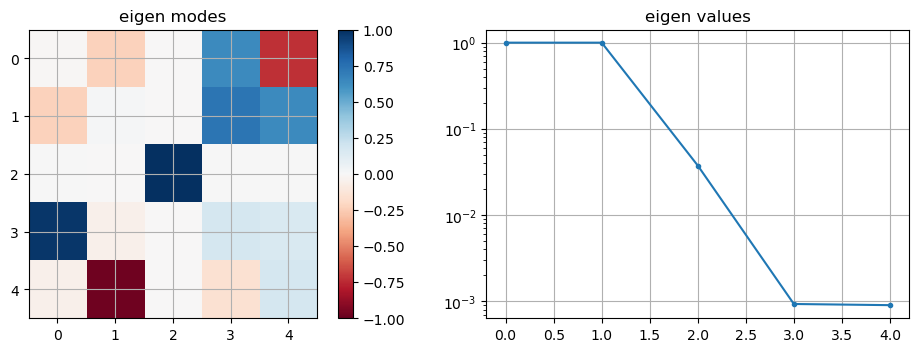

In [30]:
m2_rbm = np.load("open_loop_recon_sh48-to-m2-rbm.pkl",allow_pickle=True)
for i in range(6):
    show_svd(np.asarray(m2_rbm['calib'][i]['c']).reshape(5,-1).T)
show_svd(np.asarray(m2_rbm['calib'][6]['c']).reshape(5,-1).T)


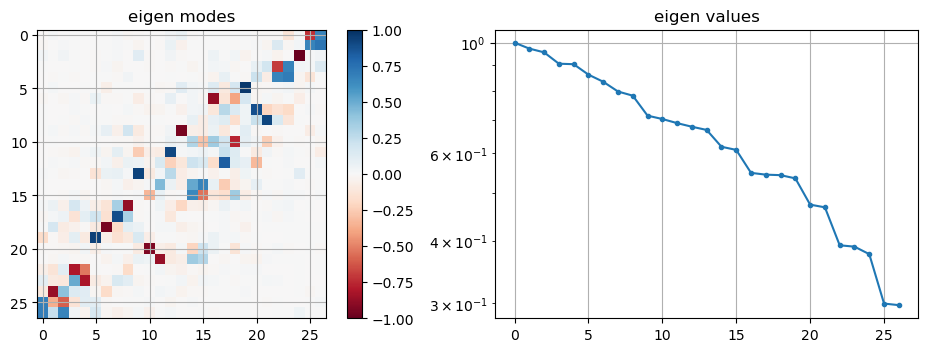

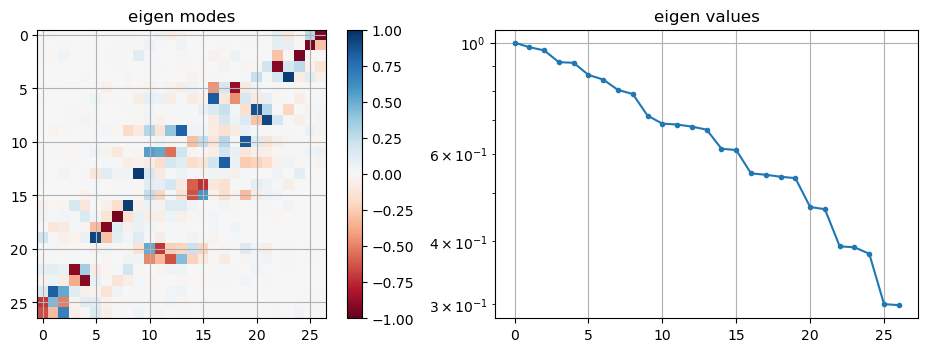

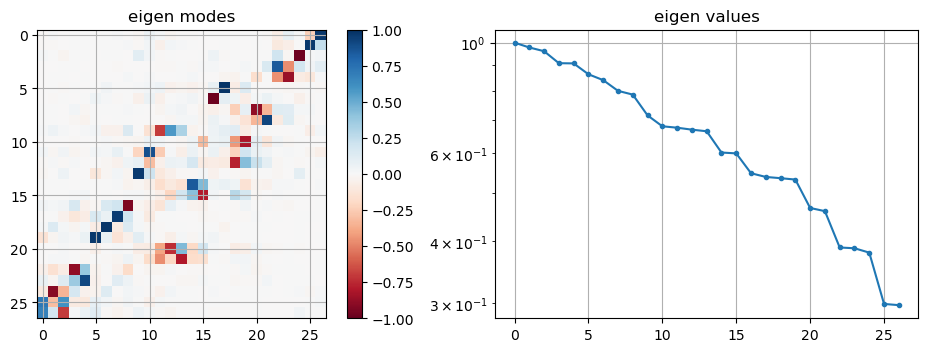

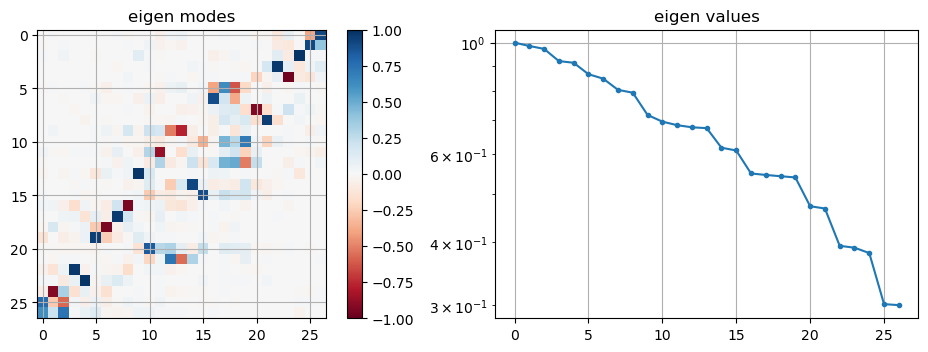

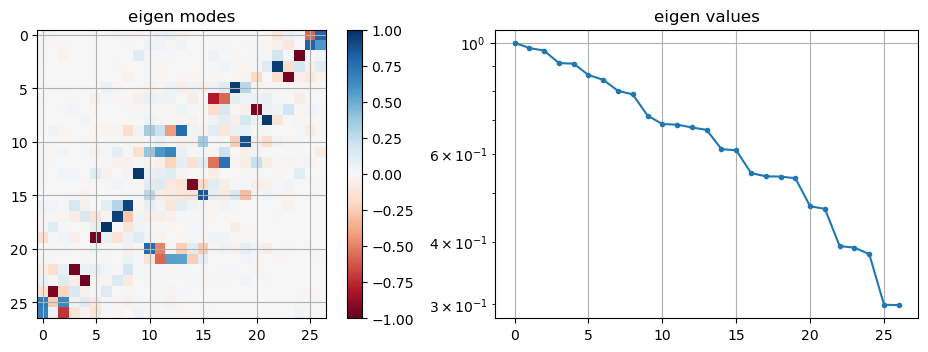

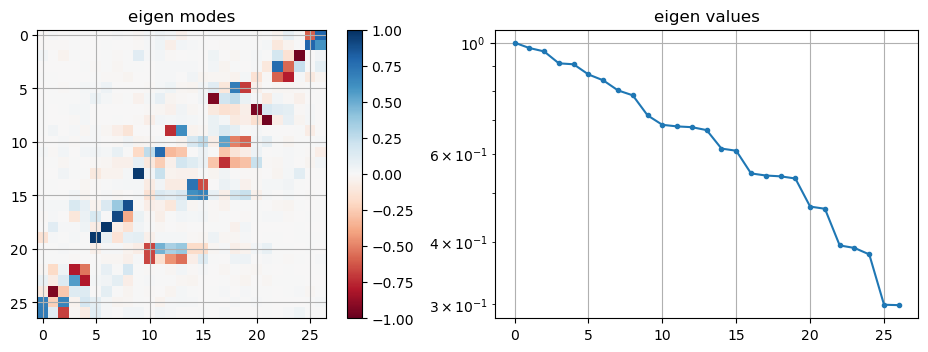

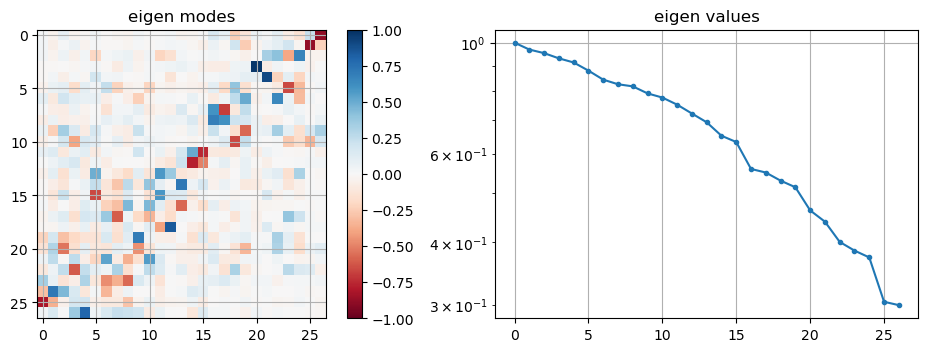

In [15]:
m1_bm = np.load("open_loop_recon_sh48-to-m1-bm.pkl",allow_pickle=True)
for i in range(7):
    show_svd(np.asarray(m1_bm['calib'][i]['c']).reshape(27,-1).T)


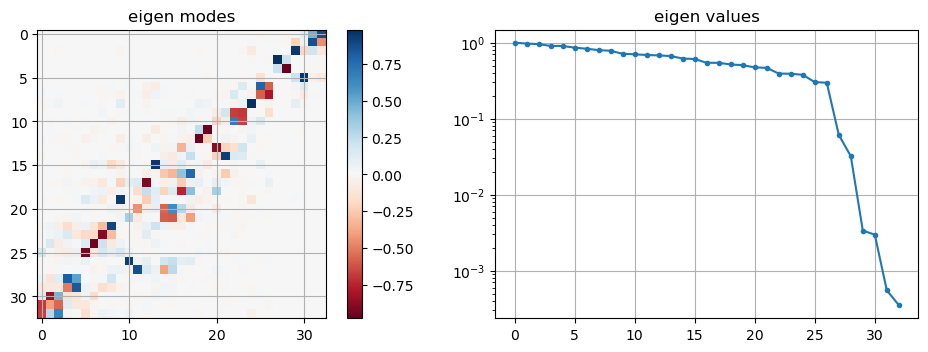

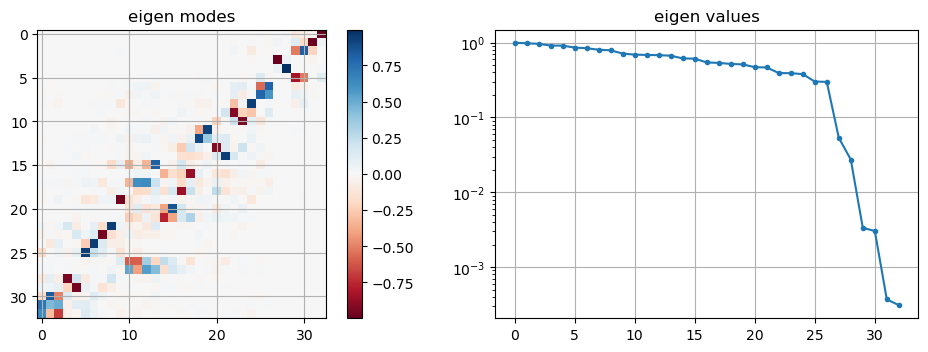

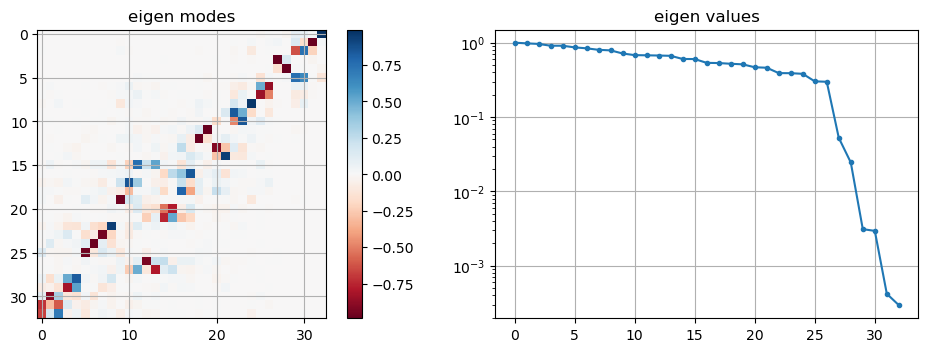

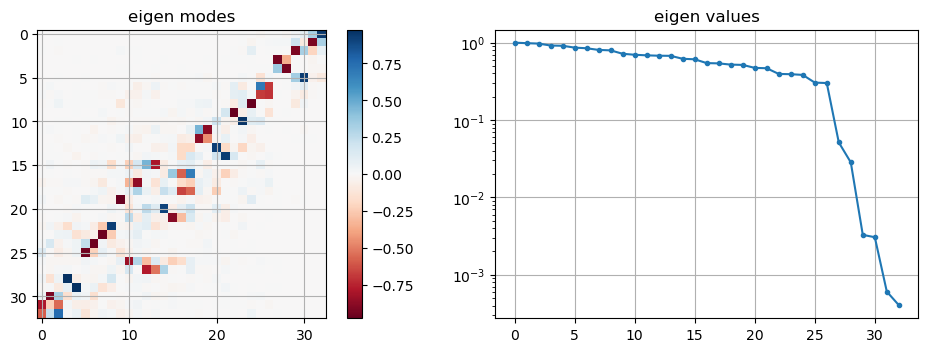

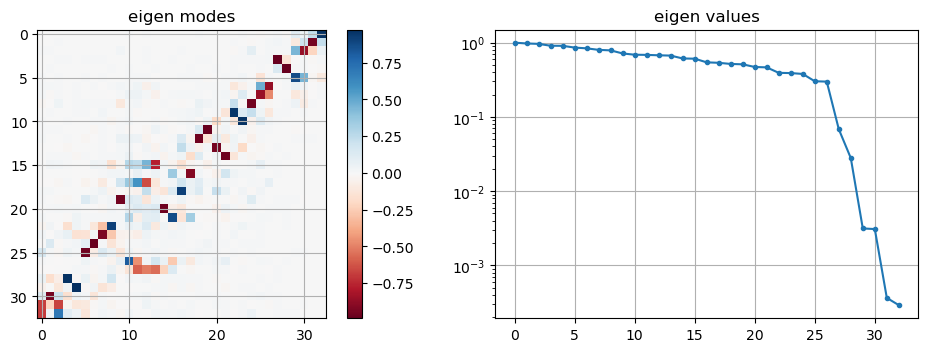

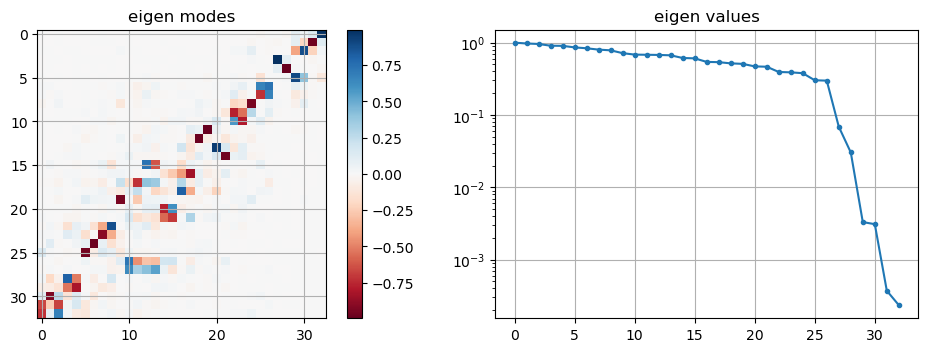

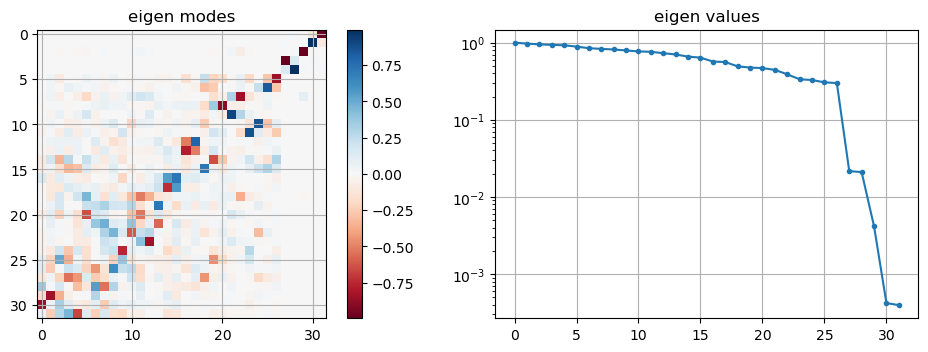

In [83]:
for i in range(6):
    r = np.asarray(m1_rbm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(6,-1).T
    m = np.asarray(m1_bm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
    mat = np.hstack([r,m])
    show_svd(mat)
r = np.asarray(m1_rbm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(5,-1).T
m = np.asarray(m1_bm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
mat = np.hstack([r,m])
show_svd(mat)

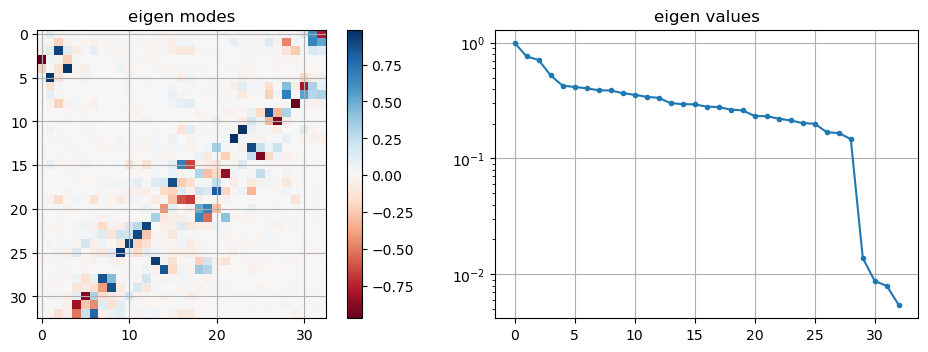

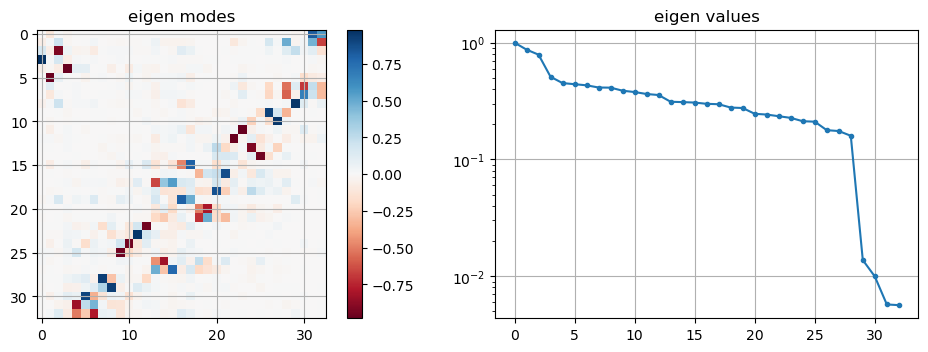

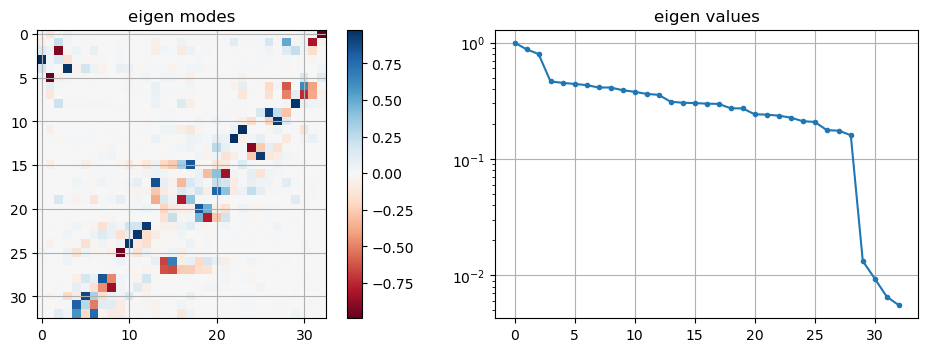

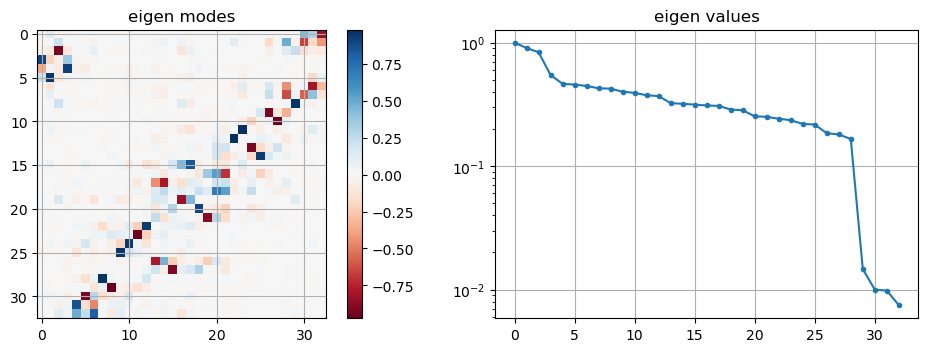

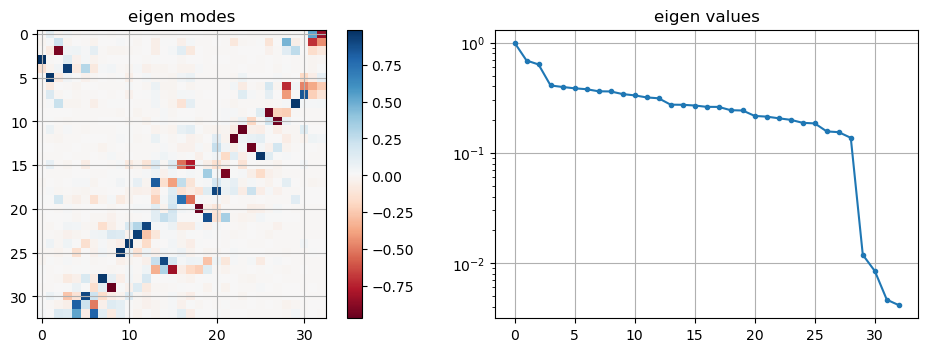

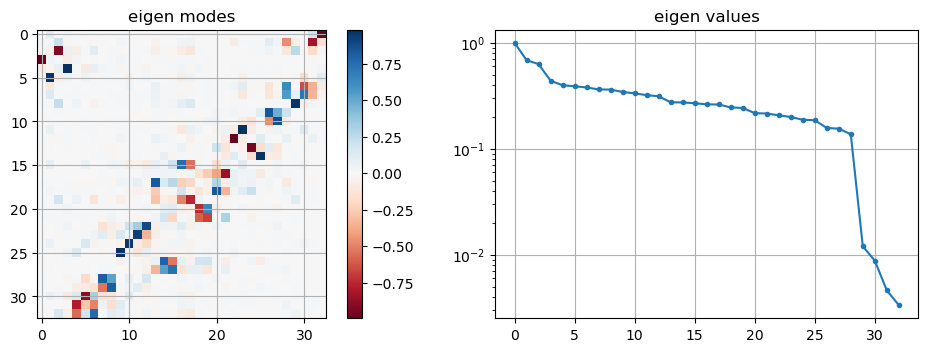

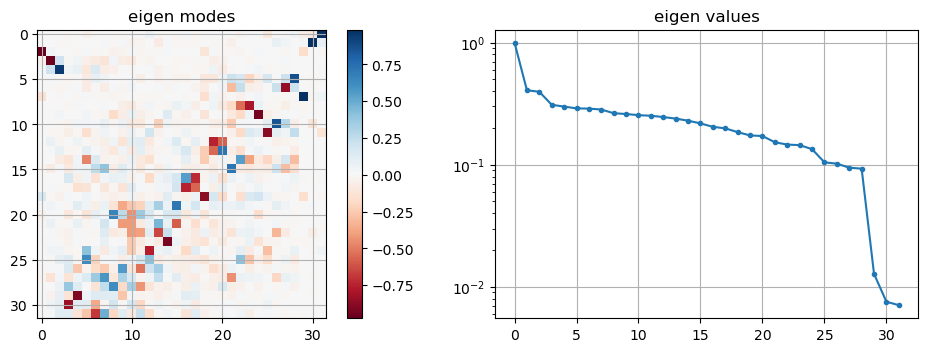

In [84]:
for i in range(6):
    r = np.asarray(m1_rbm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(6,-1).T
    m = np.asarray(m1_bm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
    mat = np.hstack([r/np.linalg.norm(r),m/np.linalg.norm(m)])
    show_svd(mat)
r = np.asarray(m1_rbm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(5,-1).T
m = np.asarray(m1_bm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
mat = np.hstack([r/np.linalg.norm(r),m/np.linalg.norm(m)])
show_svd(mat)

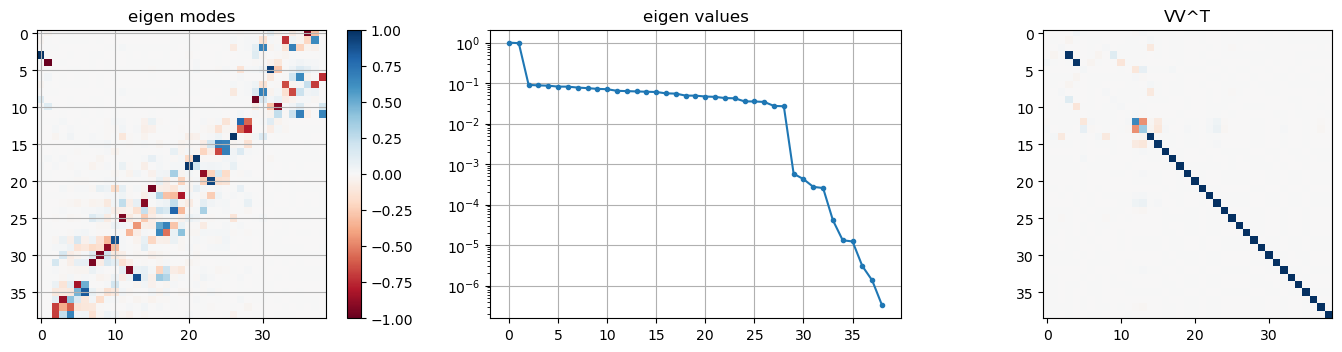

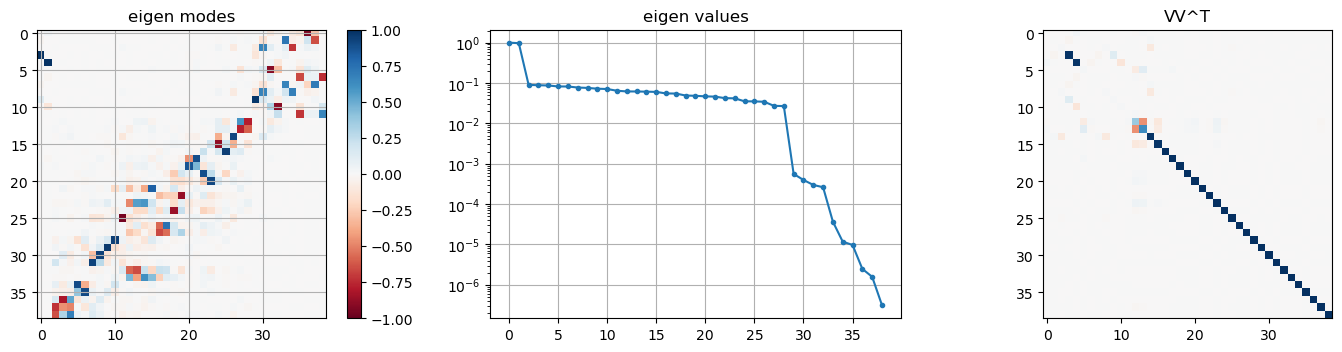

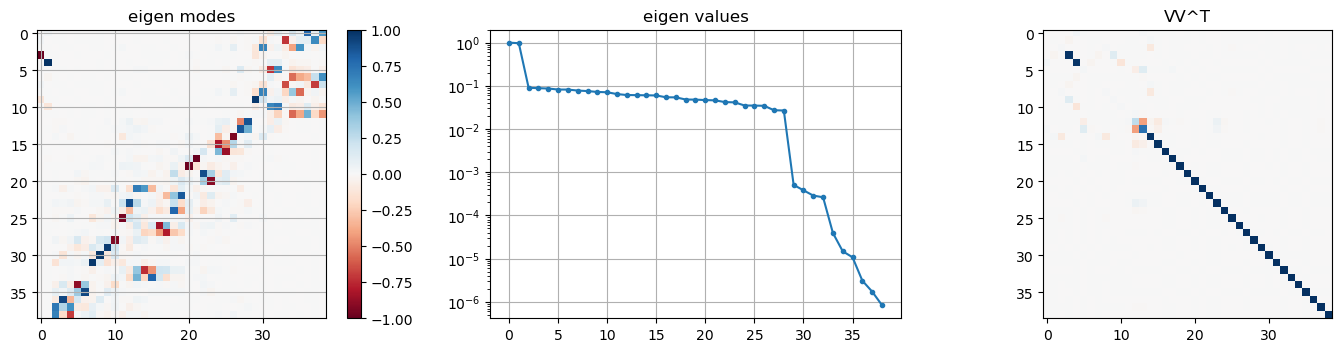

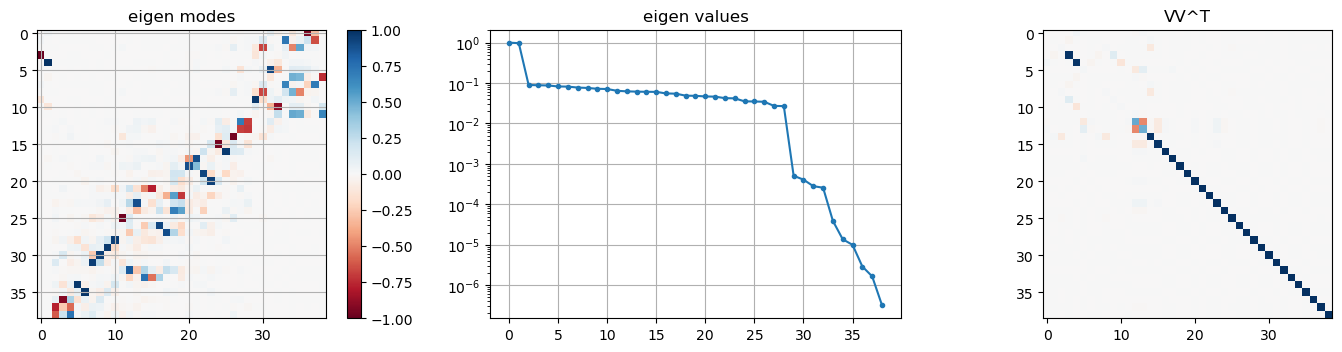

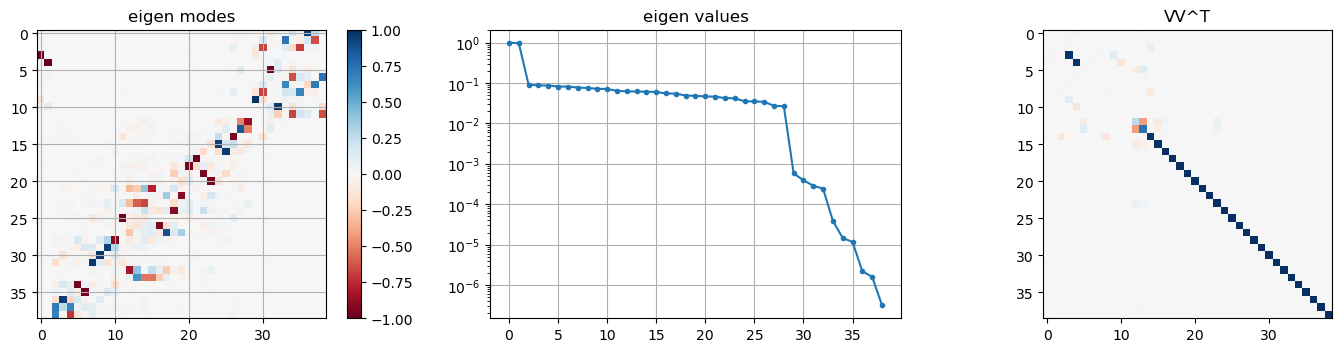

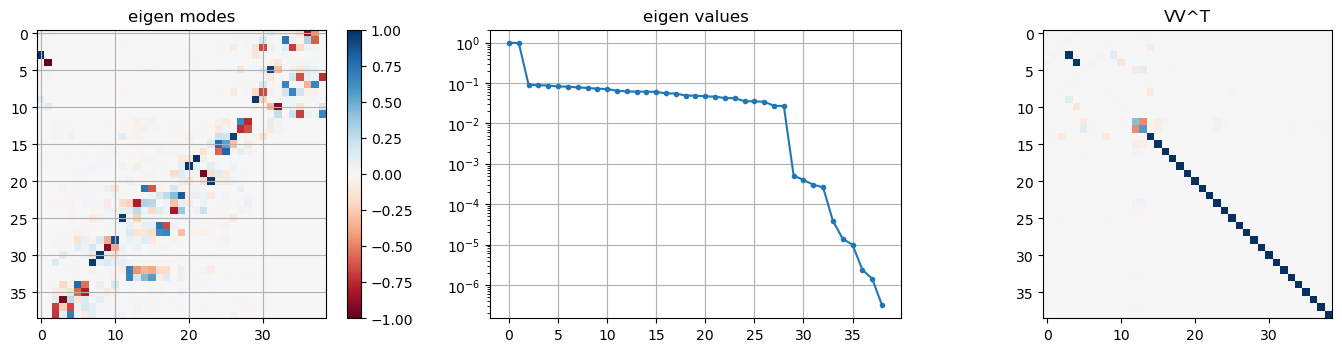

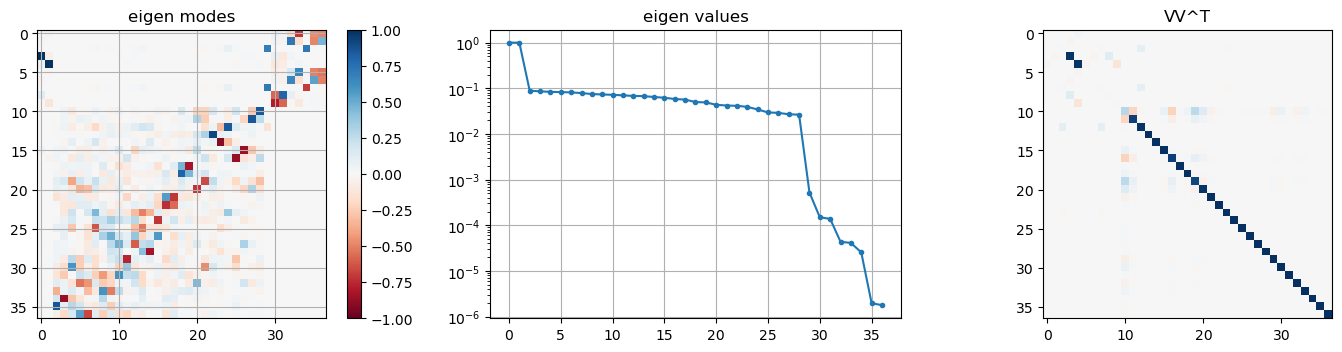

In [35]:
for i in range(6):
    r1 = np.asarray(m1_rbm['calib'][i]['c']).reshape(6,-1).T
    r2 = np.asarray(m2_rbm['calib'][i]['c']).reshape(6,-1).T
    m = np.asarray(m1_bm['calib'][i]['c']).reshape(27,-1).T
    mat = np.hstack([r1,r2,m])
    show_svd_p(mat,28)
r1 = np.asarray(m1_rbm['calib'][6]['c']).reshape(5,-1).T
r2 = np.asarray(m2_rbm['calib'][6]['c']).reshape(5,-1).T
m = np.asarray(m1_bm['calib'][6]['c']).reshape(27,-1).T
mat = np.hstack([r1,r2,m])
show_svd_p(mat,28)

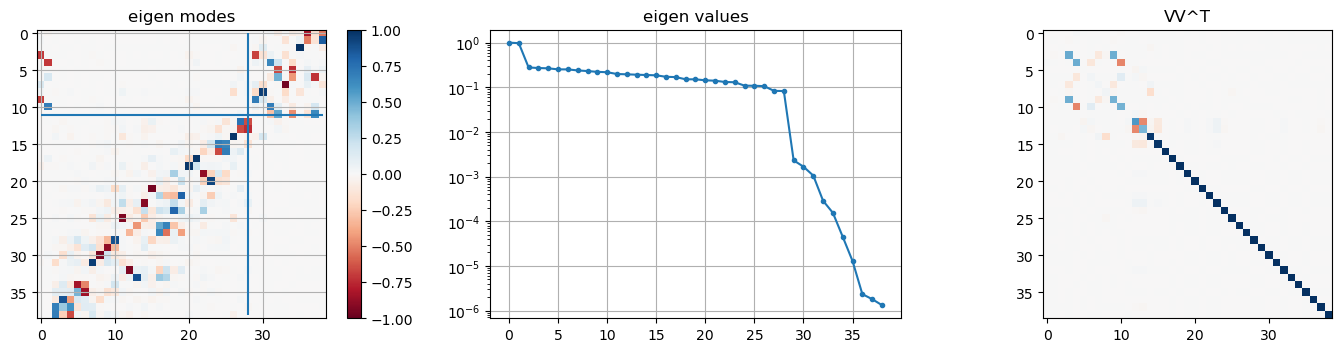

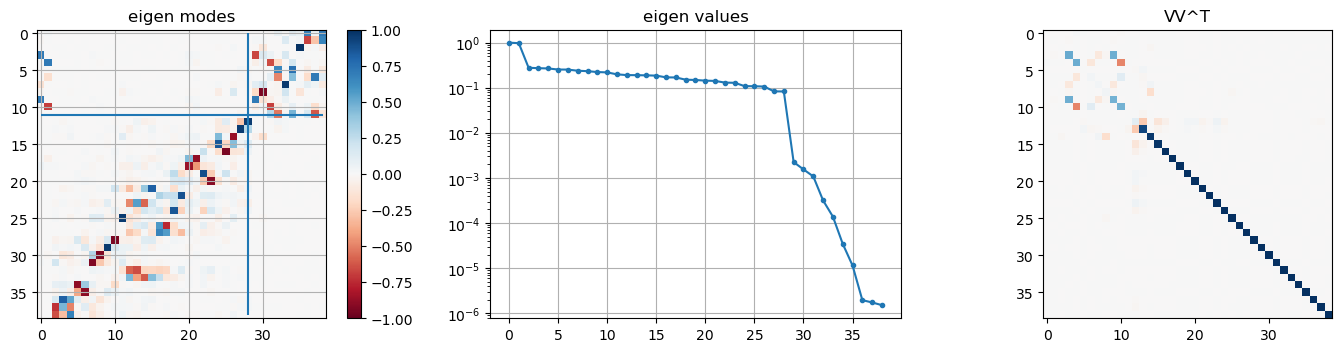

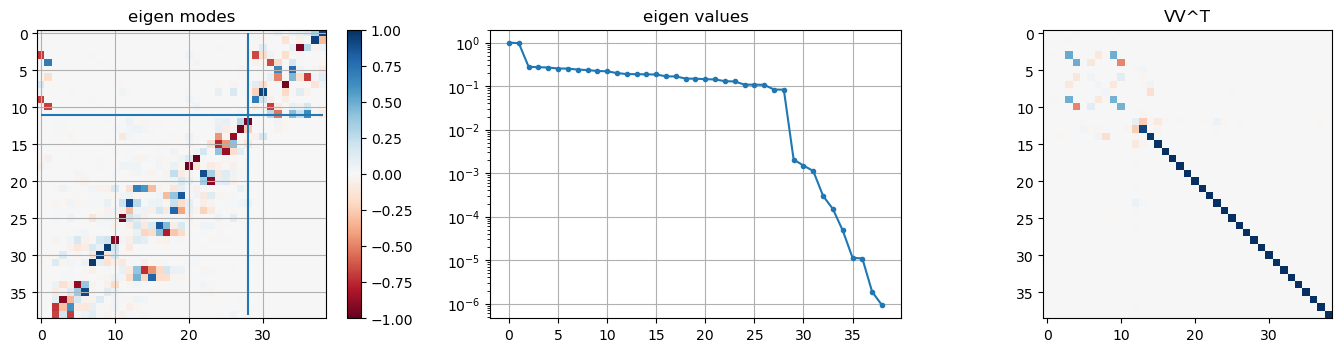

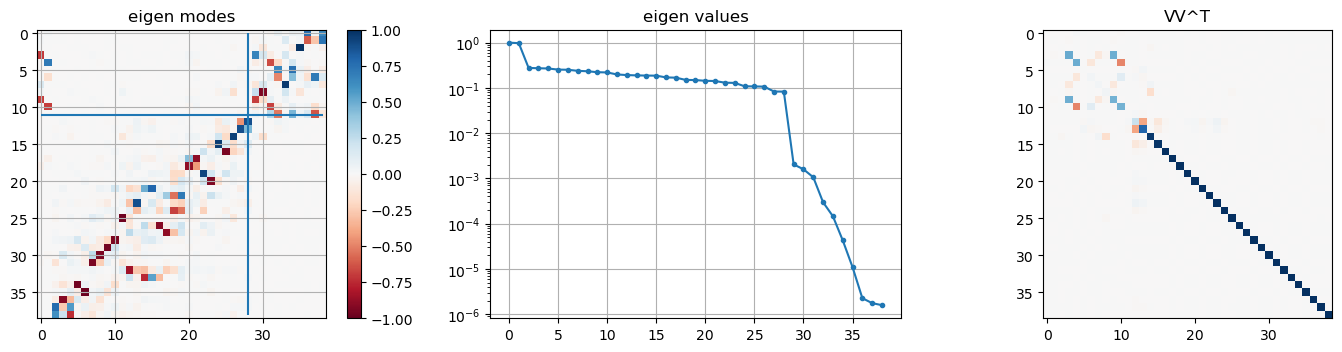

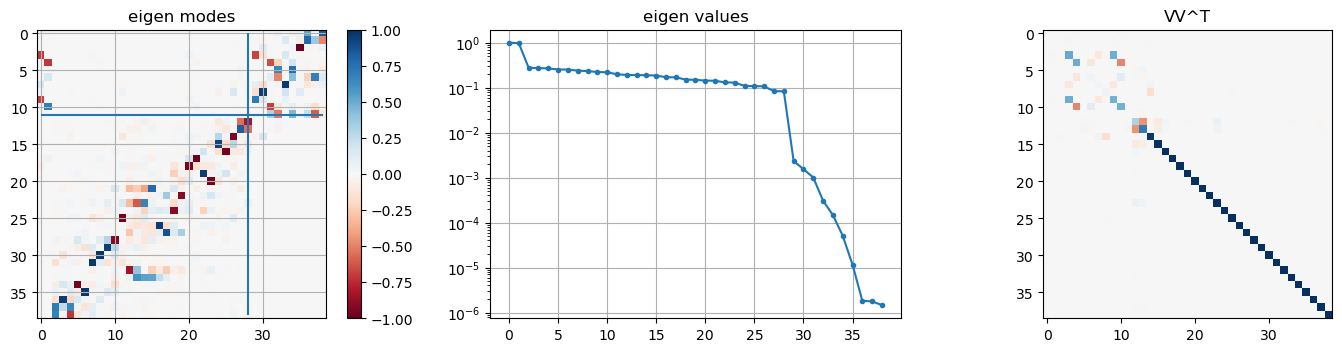

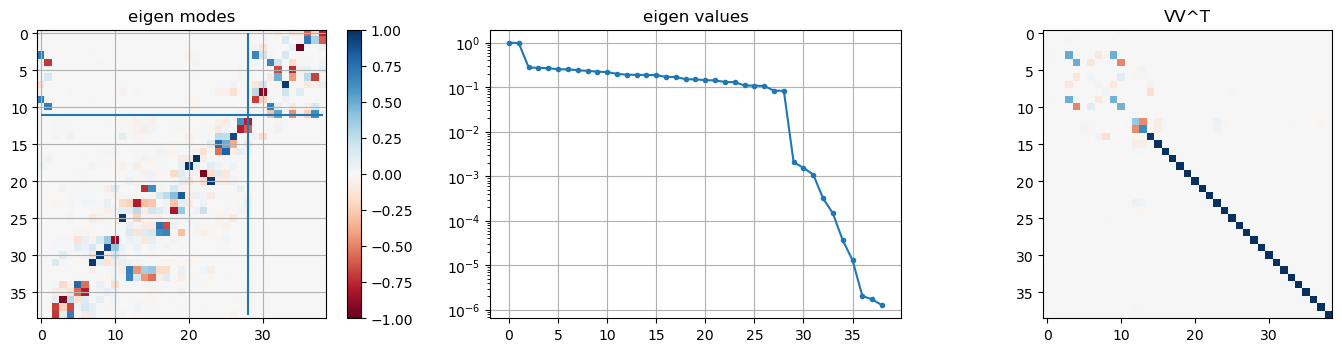

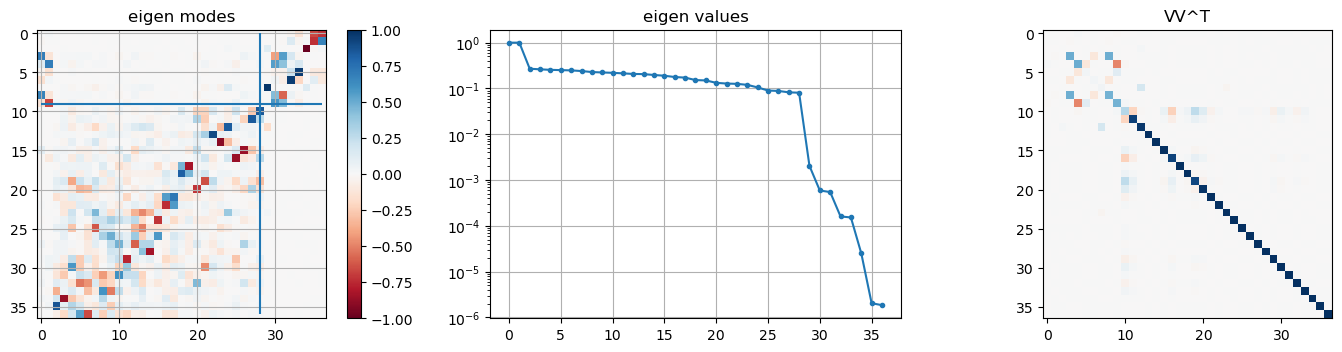

In [36]:
for i in range(6):
    r1 = np.asarray(m1_rbm['calib'][i]['c']).reshape(6,-1).T
    r2 = np.asarray(m2_rbm['calib'][i]['c']).reshape(6,-1).T
    m = np.asarray(m1_bm['calib'][i]['c']).reshape(27,-1).T
    mat = np.hstack([r1/np.linalg.norm(r1),r2/np.linalg.norm(r2),m/np.linalg.norm(m)])
    show_svd_p(mat,28,hl=11,vl=28)
r1 = np.asarray(m1_rbm['calib'][6]['c']).reshape(5,-1).T
r2 = np.asarray(m2_rbm['calib'][6]['c']).reshape(5,-1).T
m = np.asarray(m1_bm['calib'][6]['c']).reshape(27,-1).T
mat = np.hstack([r1/np.linalg.norm(r1),r2/np.linalg.norm(r2),m/np.linalg.norm(m)])
show_svd_p(mat,28,hl=9,vl=28)